# Recommendation System - Part I

Product popularity based recommendation system targeted at new customers

Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.
Dataset : Amazon product review dataset

Importing librairies

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD


In [17]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [18]:
amazon_ratings.shape

(463248, 4)

In [19]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B0009V1YR8,2869
B0000YUXI0,2143
B000FS05VG,1589
B000142FVW,1558
B000TKH6G2,1379
B000UVZU1S,1105
B000VPPUEA,1074
B00021DVCQ,1051
B0002JKPA4,1046


<Axes: xlabel='ProductId'>

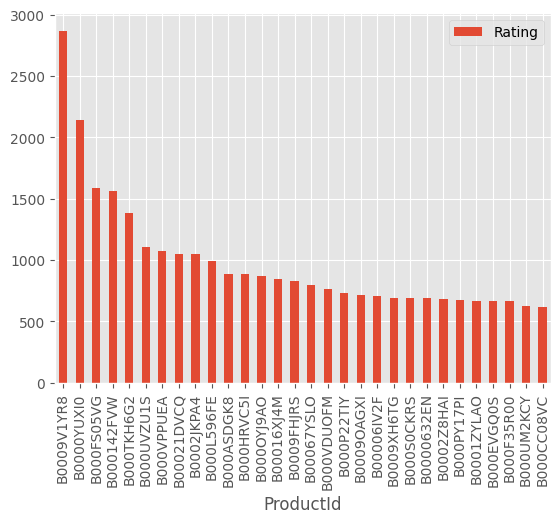

In [20]:
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

# Recommendation System - Part II

Model-based collaborative filtering system

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

Utility Matrix based on products sold and user reviews

Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [21]:
amazon_ratings1 = amazon_ratings.head(10000)

In [22]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [23]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [24]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X.shape

(886, 9697)

Unique products in subset of data

In [26]:
X1 = X

Decomposing the Matrix

In [27]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

Correlation Matrix

In [28]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [29]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [30]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [31]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

Recommending top 10 highly correlated products in sequence

In [32]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['9788075509', '9790789696', '9790800916']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

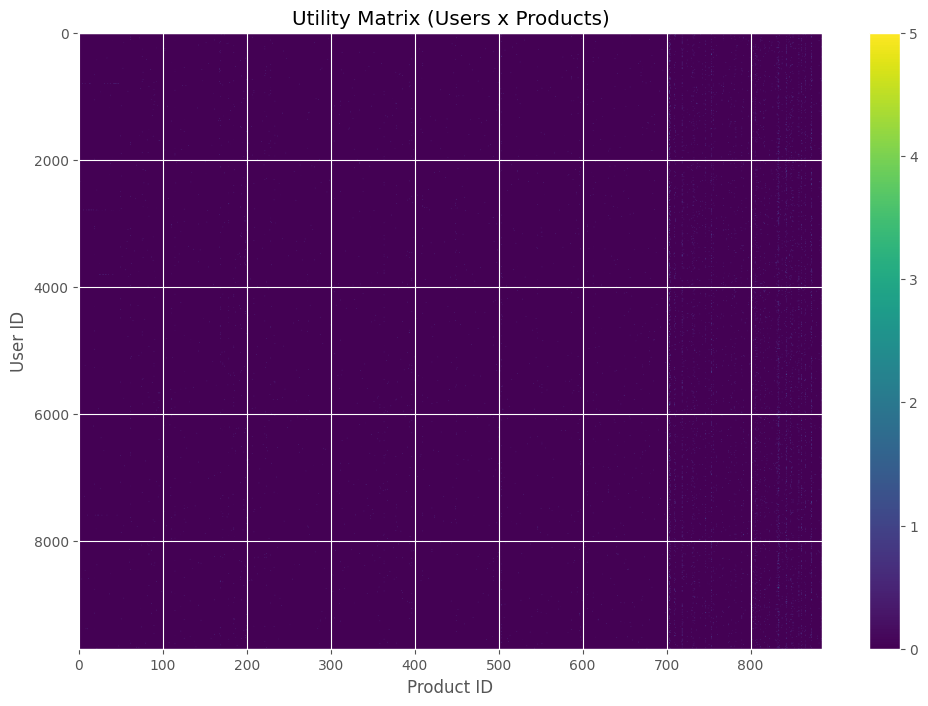

In [35]:
# Visualize the utility matrix
plt.figure(figsize=(12, 8))
plt.imshow(ratings_utility_matrix, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title("Utility Matrix (Users x Products)")
plt.xlabel("Product ID")
plt.ylabel("User ID")
plt.show()


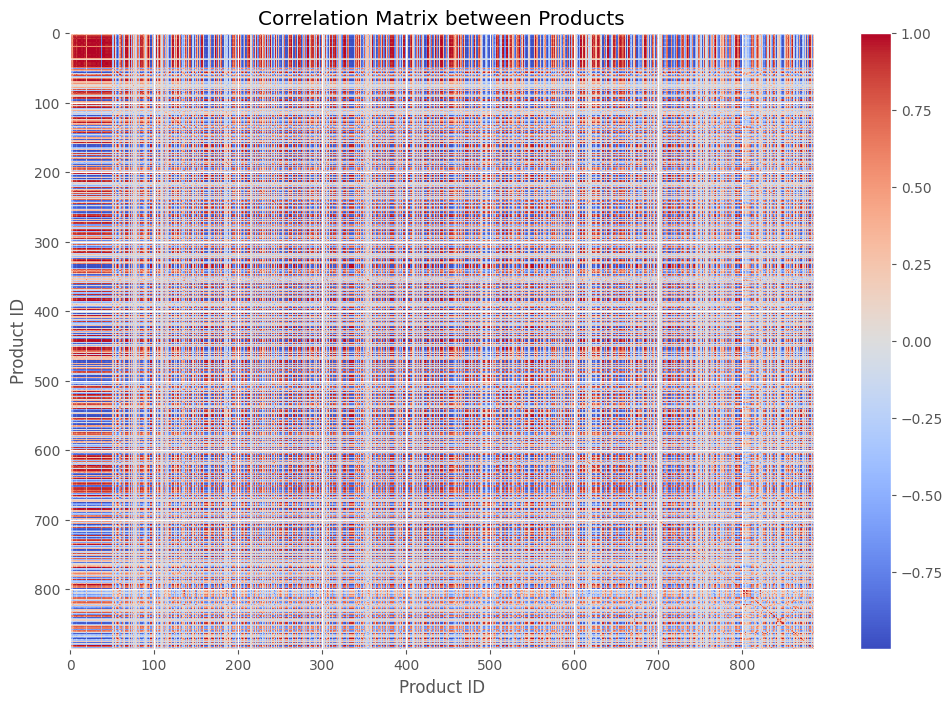

In [36]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.title("Correlation Matrix between Products")
plt.xlabel("Product ID")
plt.ylabel("Product ID")
plt.show()

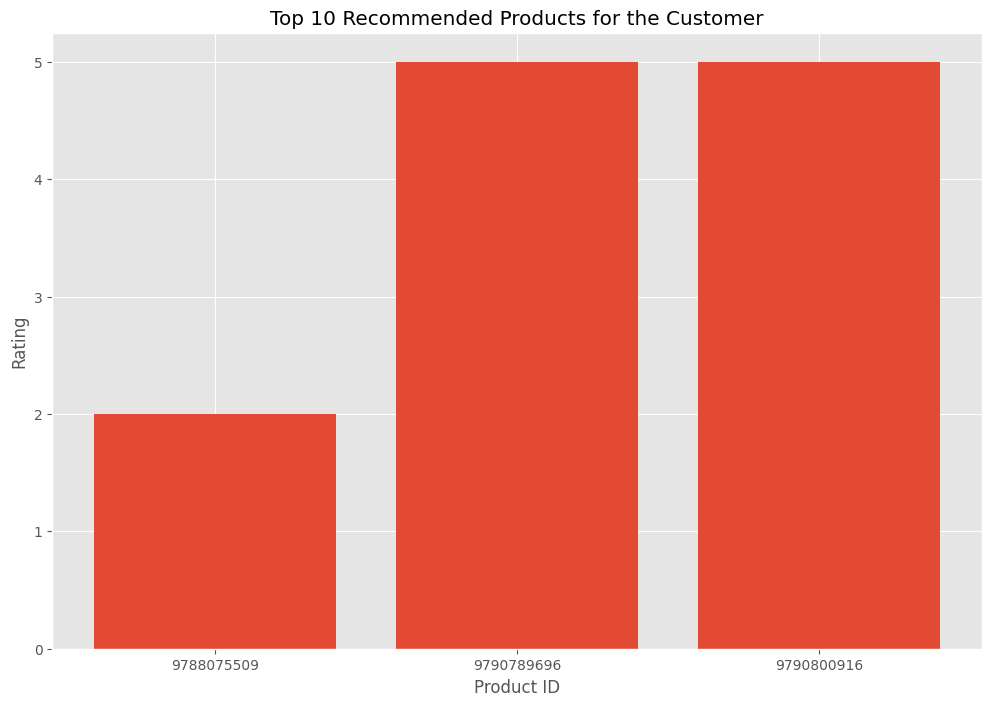

In [37]:
# Visualize the recommended products
recommended_products = amazon_ratings1[amazon_ratings1['ProductId'].isin(Recommend[0:9])]
plt.figure(figsize=(12, 8))
plt.bar(recommended_products['ProductId'], recommended_products['Rating'])
plt.title("Top 10 Recommended Products for the Customer")
plt.xlabel("Product ID")
plt.ylabel("Rating")
plt.show()

In [38]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
